In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-data-set/diabetes-dataset.csv


# Package Installation

> *It's take a time while installing.*


In [2]:
! pip install pandas numpy scikit-learn matplotlib seaborn

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#  import other packages

import pandas as pd
import numpy as np # Linear Algebra

# Set up Enviornment Path for installed Java package


In [4]:
# clone the dataset repository

! git clone https://github.com/education454/diabetes_dataset

Cloning into 'diabetes_dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


# Data Collection

> * listdown dataset here to know what's datasets we have,

In [5]:
! ls diabetes_dataset

diabetes.csv  new_test.csv


In [6]:
# Load Data set

pdf = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes-dataset.csv')

In [7]:
# Show first five rows from data set

pdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
# pandas info method applied here
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
#  show shape

pdf.shape

(2000, 9)

In [10]:
#  show how many patients has diabetes or not ? ? ?
 
print(pdf.Outcome.value_counts())


0    1316
1     684
Name: Outcome, dtype: int64


In [11]:
#  show summary statastics for all numeric columns

pdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Data Cleaning

> **First of all we need to know how many null values in the dataset.
**

In [12]:
# Column wise na values counts

pdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- Here we can see no any na values found for all colmns

In [13]:
# show how many column has 0 values and sum it

featureList = ['Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']
print(pdf[featureList].isin({0}).sum())

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64


There are most of the column has less then 50% of 0 values.

- To minimize this problem, we can replace zeros with mean values 



In [14]:
# Set "0" to Mean values of perticular columns

for col in featureList:
  pdf[col] = pdf[col].replace({ 0 : pdf[col].mean() })

*  Let's, check again how many 0 values available in data frame


In [15]:
# show "0" values count
pdf[featureList].isin({0}).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

# Visualizations



In [16]:
# Import visulazation packages

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [17]:
pdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0


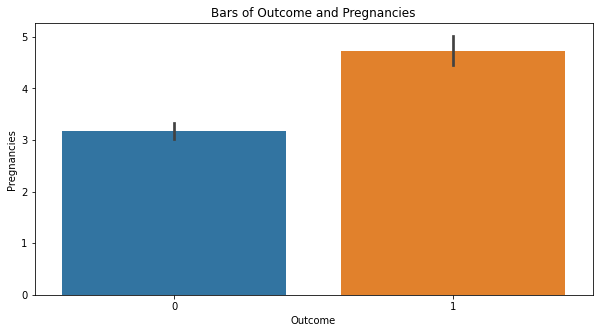

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot('Outcome', 'Pregnancies', data=pdf, ) 

plt.title("Bars of Outcome and Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()

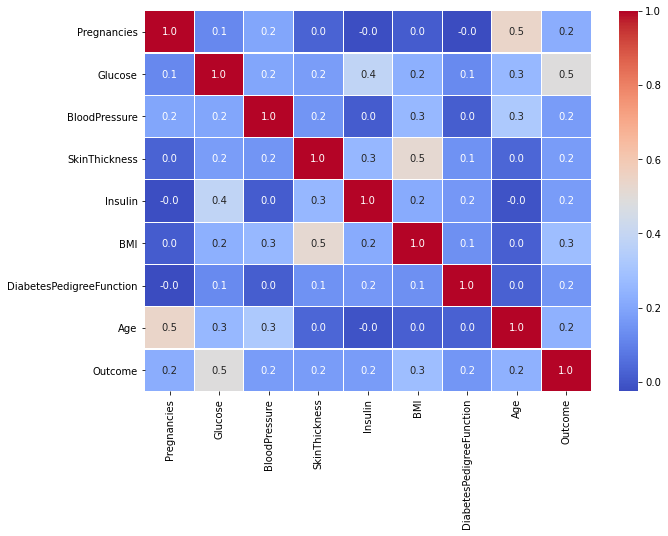

In [19]:
plt.figure(figsize=(10, 7))

sns.heatmap(pdf.corr(), annot=True, linewidths=0.2, fmt='.1f', cmap='coolwarm') # cmap='RdYlBu'
plt.show()

# Feature Selection 

In [20]:
# select feature colulmn
feature_columns = pdf[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

feature_columns.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138.0,62.0000,35.000,80.254,33.6,0.127,47
1,84.0,82.0000,31.000,125.000,38.2,0.233,23
2,145.0,69.1455,20.935,80.254,44.2,0.630,31
3,135.0,68.0000,42.000,250.000,42.3,0.365,24
4,139.0,62.0000,41.000,480.000,40.7,0.536,21


In [21]:
# Outcome colummn
outcome_column = pdf['Outcome']
outcome_column.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

- Now, Device out feature and outcome column into train and test using sklearn train_test_split functions

In [22]:
# import package

from sklearn.model_selection import train_test_split

In [23]:
# split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split( feature_columns, outcome_column, test_size=0.2, random_state=5) 


In [24]:
# show train data and shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600,)
(400,)


# Loading Model For Predictions

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
#  create model instance 

model = LogisticRegression()

In [27]:
#  Model Fitting

model = model.fit(X_train, y_train)

In [28]:
# set score
score = model.predict(X_train)

# Model Testing and Evaluation

In [29]:
# Model Score

# print("Accuracy Score: ", accuracy_score(X_train, y_train))

print("Training Score: ", model.score(X_train, y_train))
print("Testing Score:  ", model.score(X_test, y_test))


Training Score:  0.765
Testing Score:   0.7775


In [30]:
# Model Accuracy
pred = model.predict(X_test)
print("Model Accuracy is : ", pred)

Model Accuracy is :  [0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1]


In [31]:
# Model Intercept
model.intercept_

array([-8.75826374])

In [32]:
# Model Coefficient

model.coef_

array([[ 0.03667687, -0.00186085,  0.0035107 , -0.00139644,  0.0696558 ,
         0.70804848,  0.03187201]])

In [33]:
accuracy_score(y_test, pred)

0.7775